In [102]:
import pandas as pd
import os

In [103]:
FNAME = 'filtered_redis'
f = open(os.path.join('../../traces',FNAME))

In [104]:
lines = f.readlines()
# lines = [line for line in lines if '#' not in line]

In [105]:
filtered = filter(lambda x : '#' not in x, lines)

In [106]:
location = []
for x in filtered:
    words = x.split()
    for word in words:
        if 'RAM' in words and word.startswith('0x'):
            location.append(word)

In [107]:
values = [int(s,16) for s in location]

In [108]:
print(len(values))

56787


In [109]:
print(values[:5])

[139936575186400, 139937208166152, 139936585121216, 139936016123320, 139936314034120]


In [110]:
# import random
# values = random.sample(values,int(0.001*len(values)))

In [111]:
values = pd.Series(values)

In [112]:
values[values<1.3e14]

1634     94300731561648
18508    94300731523808
23085    94300731577144
25447    94300731577672
26994    94300731568208
27708    94300731564152
28637    94300731565920
34321    94300731581624
36391    94300731580472
44409    94300728996688
48311    94300731524288
49945    94300729006912
50695           1632356
50696    94300729002560
50697    94300731523592
51097    94300731575176
51294           1632356
51295    94300729001088
51460           1632356
51461    94300729002560
51798    94300731570808
51957    94300731570488
52093    94300728996912
52275           1632311
52276    94300728871328
52753    94300731557080
52810    94300728994496
53027    94300731511328
53279    94300731423832
55563    94300731563832
55588    94300731511652
55669    94300731564976
55720    94300728996768
56027           1632356
56028    94300728894272
56207    94300731423832
56747    94300731524872
56756           1632311
56757    94300729001056
56758    94300731523376
56760    94300731513012
56761    9430073

In [113]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

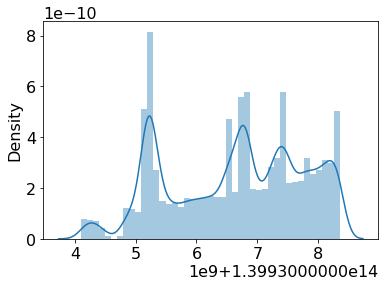

In [114]:
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
sns.distplot(values[(values>1.3e14) & (values<1.407e14)])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

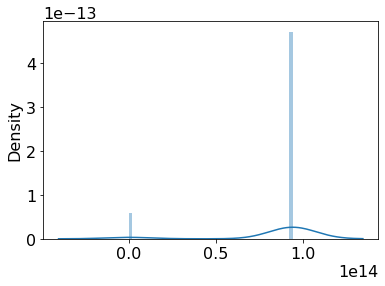

In [115]:
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
sns.distplot(values[(values<1.3e14)])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

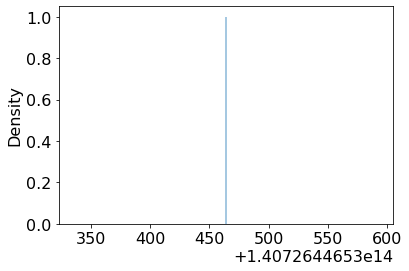

In [116]:
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
sns.distplot(values[(values>1.4e14)])

In [117]:
mpx = values.value_counts()

In [118]:
srted = {k: v for k, v in sorted(mpx.items(), key=lambda item: -item[1])}

In [119]:
user_mem = values[(values>1.3e14) & (values<1.407e14)]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

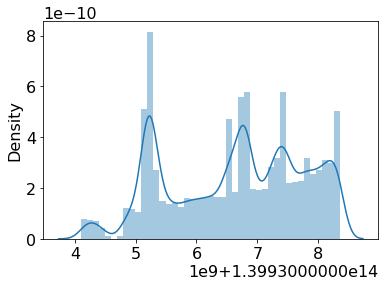

In [120]:
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
sns.distplot(user_mem)

In [121]:
import numpy as np
user_mems = np.array_split(user_mem,100)

nda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

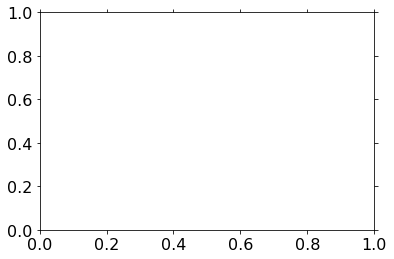

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure()
# fig.set_figheight(20)
# fig.set_figwidth(6)
ax = fig.subplots()
for i in range(0,100):
    matplotlib.rcParams.update({'font.size': 16})
    sns.distplot(user_mems[i],ax=ax)
    fig.savefig('images/redis_mem_dis_%d'%(i))
    ax.clear()

In [123]:
import cv2
import os
image_folder = 'images/'
videos_folder = 'videos/'

In [124]:
start = 0
end = 99

In [125]:
def video_gen():
    video_name = videos_folder+str(start)+'_'+str(end)+'.avi'
    images = ['redis_mem_dis_%d.png'%(time) for time in range(start,end+1)]
    images.sort()
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc('M','J','P','G'), 1, (width,height))
    cnt = 0
    for image in images:
        cnt +=1 
        if(cnt%10==0):
            print('Done with reading %d images'%(cnt))
#             break
        print(image)
#         print(cv2.imread(os.path.join(image_folder, image)).shape)
        video.write(cv2.imread(os.path.join(image_folder, image)))
        # print(video)
        print(video.__sizeof__())
#         print()
#         print(video.)
    cv2.destroyAllWindows()
    video.release()
    print(video)

In [126]:
video_gen()


redis_mem_dis_0.png
32
redis_mem_dis_1.png
32
redis_mem_dis_10.png
32
redis_mem_dis_11.png
32
redis_mem_dis_12.png
32
redis_mem_dis_13.png
32
redis_mem_dis_14.png
32
redis_mem_dis_15.png
32
redis_mem_dis_16.png
32
Done with reading 10 images
redis_mem_dis_17.png
32
redis_mem_dis_18.png
32
redis_mem_dis_19.png
32
redis_mem_dis_2.png
32
redis_mem_dis_20.png
32
redis_mem_dis_21.png
32
redis_mem_dis_22.png
32
redis_mem_dis_23.png
32
redis_mem_dis_24.png
32
redis_mem_dis_25.png
32
Done with reading 20 images
redis_mem_dis_26.png
32
redis_mem_dis_27.png
32
redis_mem_dis_28.png
32
redis_mem_dis_29.png
32
redis_mem_dis_3.png
32
redis_mem_dis_30.png
32
redis_mem_dis_31.png
32
redis_mem_dis_32.png
32
redis_mem_dis_33.png
32
redis_mem_dis_34.png
32
Done with reading 30 images
redis_mem_dis_35.png
32
redis_mem_dis_36.png
32
redis_mem_dis_37.png
32
redis_mem_dis_38.png
32
redis_mem_dis_39.png
32
redis_mem_dis_4.png
32
redis_mem_dis_40.png
32
redis_mem_dis_41.png
32
redis_mem_dis_42.png
32
redis_mem